In [605]:
import numpy as np
import pandas as pd

In [606]:
df = pd.read_csv("car_fuel_efficiency.csv")
df.head()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [607]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [608]:
import matplotlib as plt
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

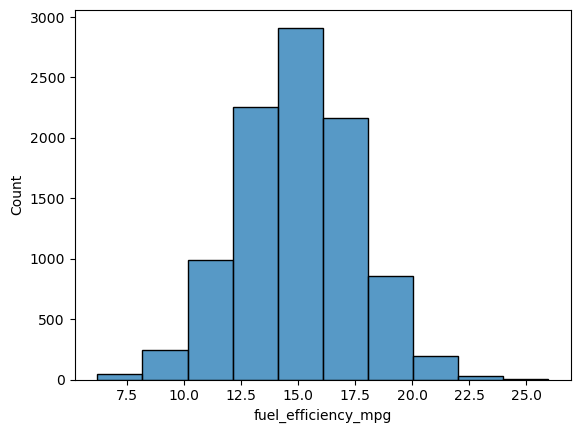

In [609]:
sns.histplot(df.fuel_efficiency_mpg, bins=10)

In [610]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [611]:
df['horsepower'].median()

149.0

In [612]:
df['horsepower'].fillna(0).median()

146.0

In [613]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train


(1940, 1940, 5824)

In [614]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [615]:
idx_train = idx[:n_train]
idx_val = idx[n_train:n_train + n_val]
idx_test = idx[n_train + n_val:]

In [616]:
features = ['engine_displacement','horsepower','vehicle_weight','model_year']

x_train = df[features].iloc[idx_train]
x_train = x_train.reset_index(drop=True)
y_train = df['fuel_efficiency_mpg'].iloc[idx_train]

x_val = df[features].iloc[idx_val].fillna(0)
x_val = x_val.reset_index(drop=True)
y_val = df['fuel_efficiency_mpg'].iloc[idx_val]

x_test = df[features].iloc[idx_test].fillna(0)
x_test = x_test.reset_index(drop=True)
y_test = df['fuel_efficiency_mpg'].iloc[idx_test]

In [617]:
X_train = x_train.fillna(0)
ones = np.ones((X_train.shape[0], 1))
X_train = np.column_stack((ones, X_train))
X_train

array([[1.00000000e+00, 2.20000000e+02, 1.44000000e+02, 2.53588759e+03,
        2.00900000e+03],
       [1.00000000e+00, 1.60000000e+02, 1.41000000e+02, 2.74117048e+03,
        2.01900000e+03],
       [1.00000000e+00, 2.30000000e+02, 1.55000000e+02, 2.47188024e+03,
        2.01700000e+03],
       ...,
       [1.00000000e+00, 2.10000000e+02, 1.52000000e+02, 2.50017569e+03,
        2.02000000e+03],
       [1.00000000e+00, 2.50000000e+02, 1.54000000e+02, 2.25431324e+03,
        2.00200000e+03],
       [1.00000000e+00, 2.10000000e+02, 1.52000000e+02, 2.43520361e+03,
        2.00400000e+03]])

In [618]:
XTX = X_train.T.dot(X_train)
XTX_inv = np.linalg.inv(XTX)
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.,  0.,  0.],
       [-0.,  1.,  0.,  0.,  0.],
       [-0.,  0.,  1.,  0.,  0.],
       [ 0., -0.,  0.,  1., -0.],
       [ 0., -0.,  0.,  0.,  1.]])

In [619]:
w_full = XTX_inv.dot(X_train.T).dot(y_train)
w_full

array([ 2.88273655e+01,  9.93613218e-05,  3.54221891e-03, -5.01328015e-03,
        3.42992869e-04])

In [620]:
w0, w = w_full[0], w_full[0:]

In [621]:
w0

28.827365474892737

In [622]:
w

array([ 2.88273655e+01,  9.93613218e-05,  3.54221891e-03, -5.01328015e-03,
        3.42992869e-04])